In [7]:
#Surse:
#https://github.com/kb22/Income-Predictor/blob/master/Income%20Predictor.ipynb?fbclid=IwAR0zSKEAPDFc8yoSb0ovsIcvFm7vZ7AFEVXupRIkpeJQcXEVCKxejdnVtnE
#youtube.com/watch?v=zUqa6KcwRhs
# Working with data

#exercitiul 1!!!!!!!!!!
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');


#Importing the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
dataset= pd.read_csv('data_train.csv', names=columns)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
NaN,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
27239.0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
19102.0,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
16791.0,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
2832.0,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K


In [8]:
#transform coloana 'label' intr-o clasa numerica
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['label'] = labelEncoder.fit_transform(dataset['label'])

In [9]:
#transform coloanele care au valori numerice folosind aceasta functie, pentru a evita ulterioare erori
data=dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]

le = preprocessing.LabelEncoder()
for column in data.columns:
    if dataset[column].dtype == type(object):
        #le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29305 entries, nan to 8900.0
Data columns (total 15 columns):
age               29305 non-null int32
workclass         29305 non-null object
fnlwgt            29305 non-null int32
education         29305 non-null object
education-num     29305 non-null int32
marital-status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital-gain      29305 non-null int32
capital-loss      29305 non-null int32
hours-per-week    29305 non-null int32
native-country    29305 non-null object
label             29305 non-null int32
dtypes: int32(7), object(8)
memory usage: 2.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017417D0F048>,
      dtype=object)

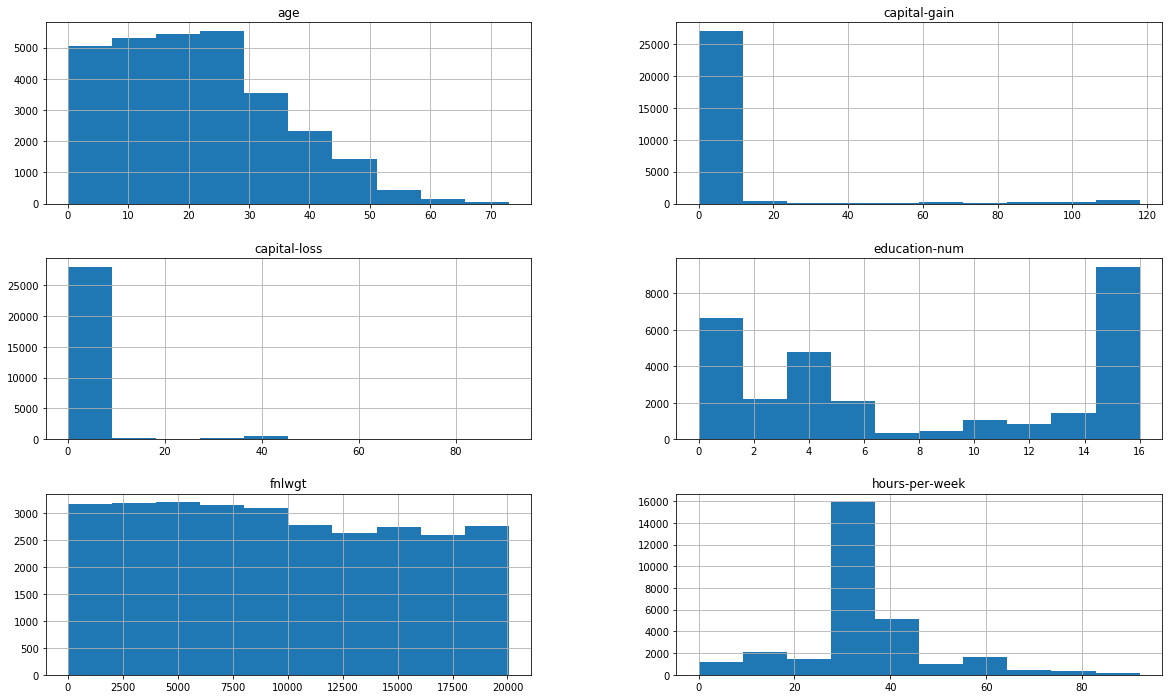

In [11]:
rcParams['figure.figsize'] = 20, 12
dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].hist() 
#aici sunt coloanele numerice care pot fi figurate

In [12]:
#From the histograms above, I can infer the following:

#I can group the age column into bins.
#For capital-gain and capital-loss the data is highly left skewed which needs to be tackled.
#We need to analyse education-numb further as it might align with education information.
#The hours-per-week can also be split into bins.
data=dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]
#data

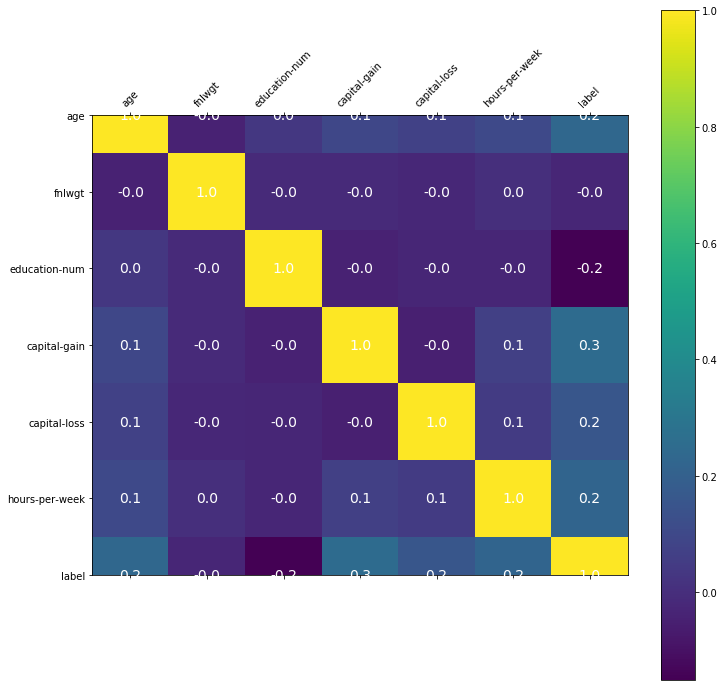

In [13]:
plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [14]:
#tocmai am figurat matricea de corelatie, care arata ca nu este o corelatie mare intre variabilele continue si label
#observam ca fnlwgt are corelatie 0 cu label, de aceea o vom ignora mai tarziu(ceea ce am putea observa si facand un algoritm PCA)
#vom analiza variabilele categorice folosind CountPlot
#studiem pe rand comportamentul fiecarei variabile, raportat la 'label'

In [15]:
#vom incepe cu coloana 'age'

#vom clasifica persoanele, in functie de varsta, astfel:
# 0-25: tanar
#25-50: adult
#50-100: batran

In [16]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['tanar', 'adult', 'batran'])


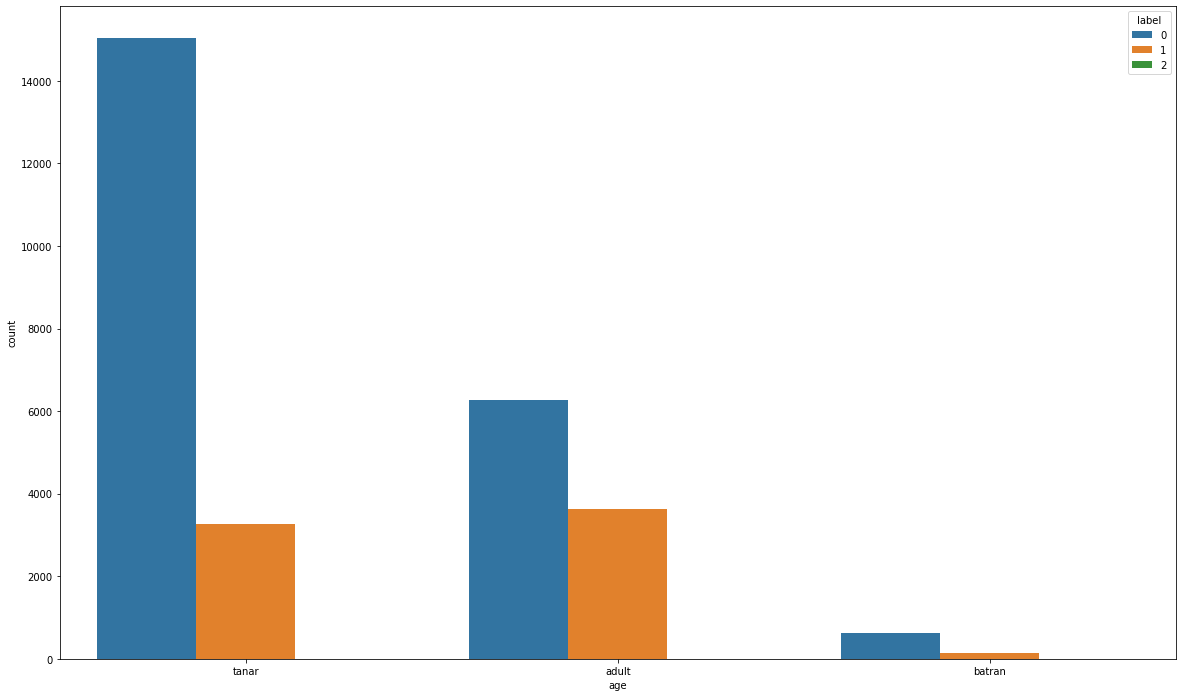

In [17]:
sns.countplot(x = 'age', hue = 'label', data = dataset)


In [18]:
#observam ca inaintand in varsta, scade numarul persoanelor cu mai mult de 50K

In [19]:
#trecem la 'capital-gain' si 'capital-loss'
#nu le vom folosi pe amandoua, ci vom folosi diferenta dintre ele

In [20]:
dataset['capital-diff'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.drop(['capital-gain'], axis = 1, inplace = True)
dataset.drop(['capital-loss'], axis = 1, inplace = True)

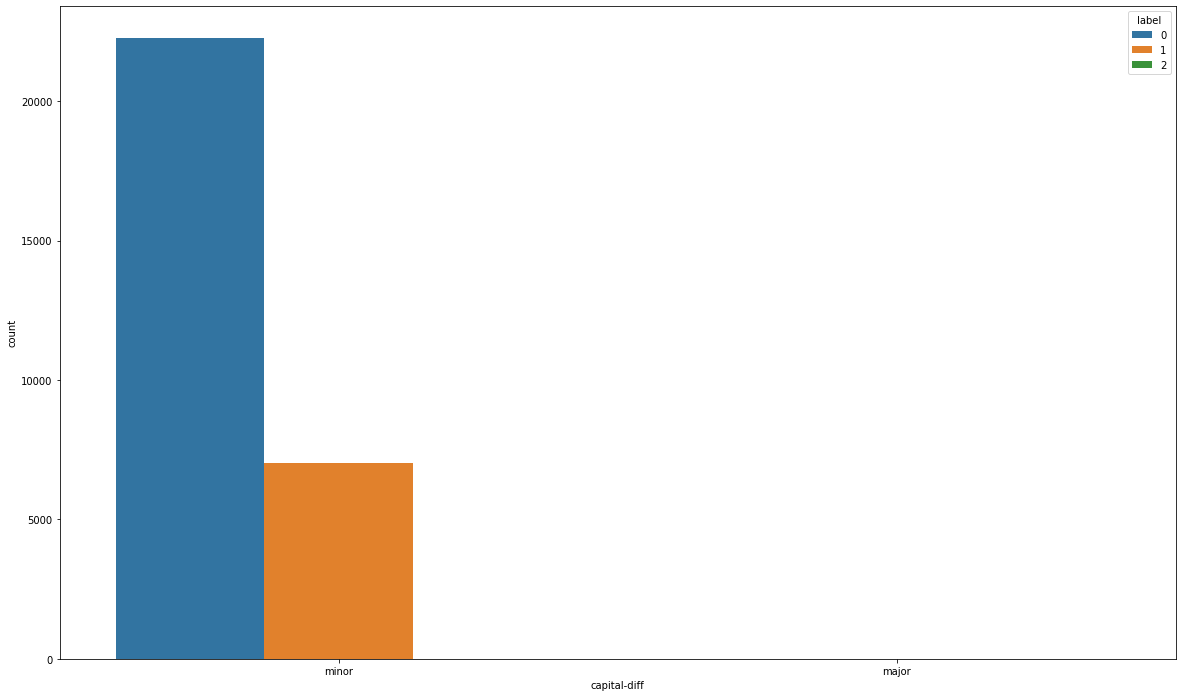

In [21]:
dataset['capital-diff'] = pd.cut(dataset['capital-diff'], bins = [-5000, 5000, 100000], labels = ['minor', 'major'])
sns.countplot(x = 'capital-diff', hue = 'label', data = dataset)

In [22]:
#observam ca pentru 'minor' sunt mai multe persoane care au mai putin decat 50K

In [23]:
#in ceea ce priveste coloana 'fnlwgt', neavand corelatie cu 'label', o vom scoate

In [24]:
#pentru coloana 'hours-per-week', observam din histograma ca este aproximativ centrata informatia
#in mod normal, pe saptamana este normal sa avem intre 30 si 40 de ore de munca, asadar facem departajea: 0-30, 30-40, 40-100


In [25]:
dataset['hours-per-week'] = pd.cut(dataset['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['inf-ore', 'normal-ore', 'extra-ore'])

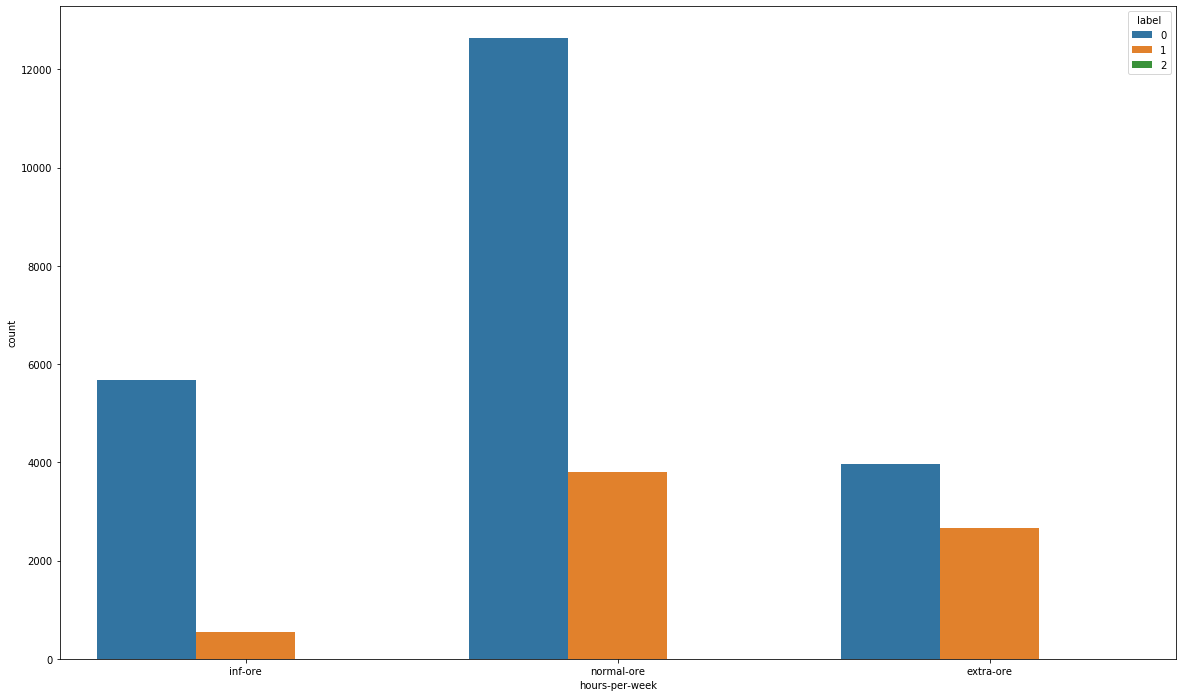

In [26]:
sns.countplot(x = 'hours-per-week', hue = 'label', data = dataset)

In [27]:
#observam ca daca numarul de ore creste, creste si numarul persoanelor care au mai mult de 50K

In [28]:
#pentru coloana 'workclass'

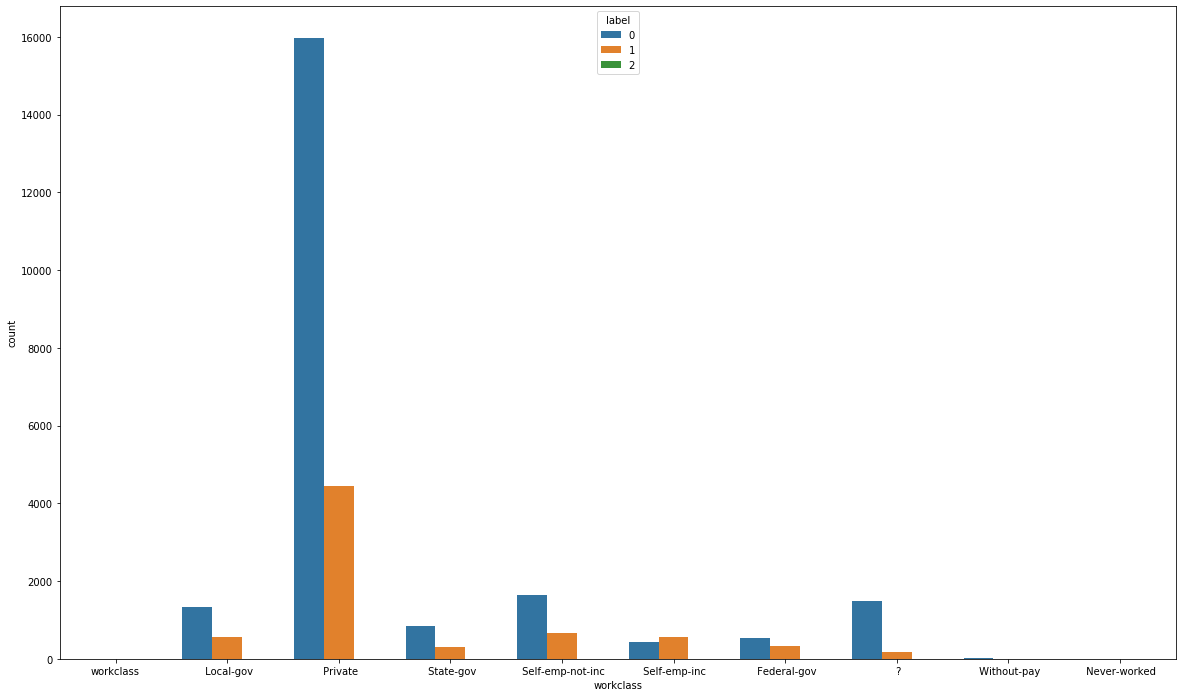

In [29]:
sns.countplot(x = 'workclass', hue = 'label', data = dataset)

In [30]:
#observam ca sunt valori care lipsesc, asadar le vom sterge.
#de asemenea cazurile 'Without-pay' si 'Never-worked' sunt neglijabile, asa incat le putem ignora

In [31]:
dataset = dataset.drop(dataset[dataset['workclass'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['workclass'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['workclass'] == ' Never-worked'].index)

In [32]:
#vom studia daca relationeaza 'education' si 'education-num'

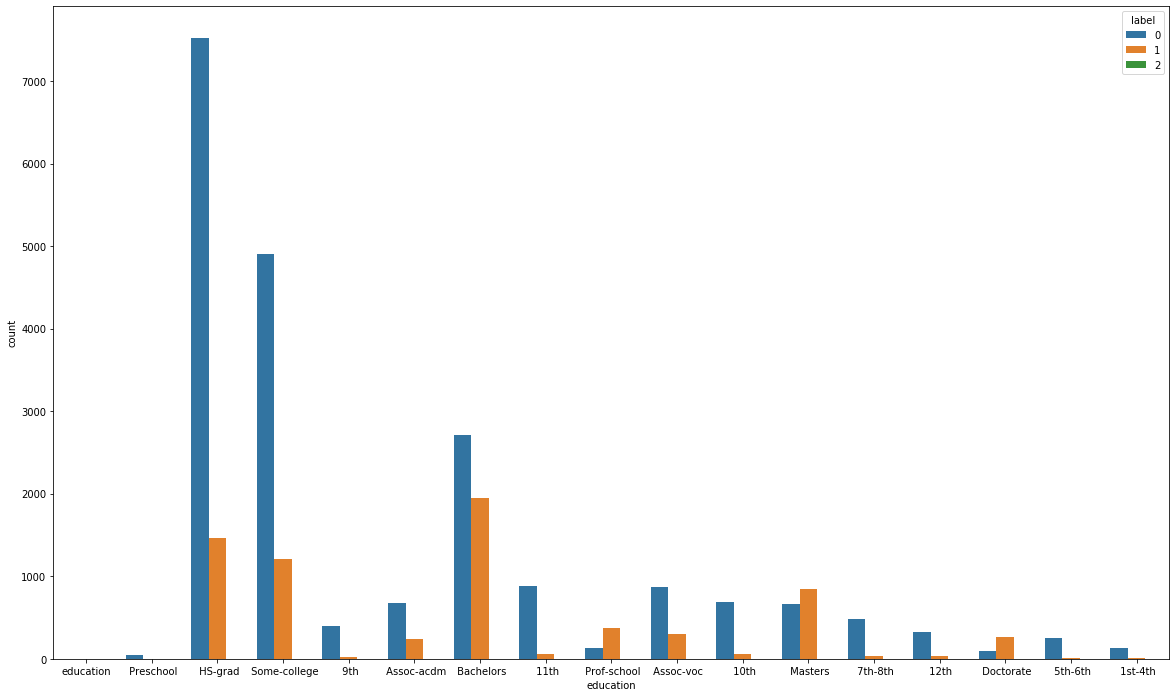

In [33]:
sns.countplot(x = 'education', hue = 'label', data = dataset)

In [34]:
education_classes = dataset['education'].unique()
for edu_class in education_classes:
    print("For {}, the education-num is {}"
          .format(edu_class, dataset[dataset['education'] == edu_class]['education-num'].unique()))

For education, the education-num is [16]
For  Preschool, the education-num is [0]
For  HS-grad, the education-num is [15]
For  Some-college, the education-num is [1]
For  9th, the education-num is [11]
For  Assoc-acdm, the education-num is [3]
For  Bachelors, the education-num is [4]
For  11th, the education-num is [13]
For  Prof-school, the education-num is [6]
For  Assoc-voc, the education-num is [2]
For  10th, the education-num is [12]
For  Masters, the education-num is [5]
For  7th-8th, the education-num is [10]
For  12th, the education-num is [14]
For  Doctorate, the education-num is [7]
For  5th-6th, the education-num is [9]
For  1st-4th, the education-num is [8]


In [35]:
#observam ca cele doua pot fi identificate, asadar e suficient sa pastram doar una
#putem comprima informatii de la 'Preschool' pana la '12th'

dataset.drop(['education-num'], axis = 1, inplace = True)
dataset['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['education'].value_counts()

 HS-grad         8987
 Some-college    6113
 Bachelors       4657
 School          3422
 Masters         1511
 Assoc-voc       1174
 Assoc-acdm       917
 Prof-school      501
 Doctorate        354
education           1
Name: education, dtype: int64

In [36]:
# pentru 'marital-status' si 'relationship'

dataset['marital-status'].value_counts()

 Married-civ-spouse       12860
 Never-married             8969
 Divorced                  3835
 Separated                  859
 Widowed                    750
 Married-spouse-absent      343
 Married-AF-spouse           20
marital-status                1
Name: marital-status, dtype: int64

In [37]:
dataset['relationship'].value_counts()


 Husband           11416
 Not-in-family      7058
 Own-child          4090
 Unmarried          2961
 Wife               1271
 Other-relative      840
relationship           1
Name: relationship, dtype: int64

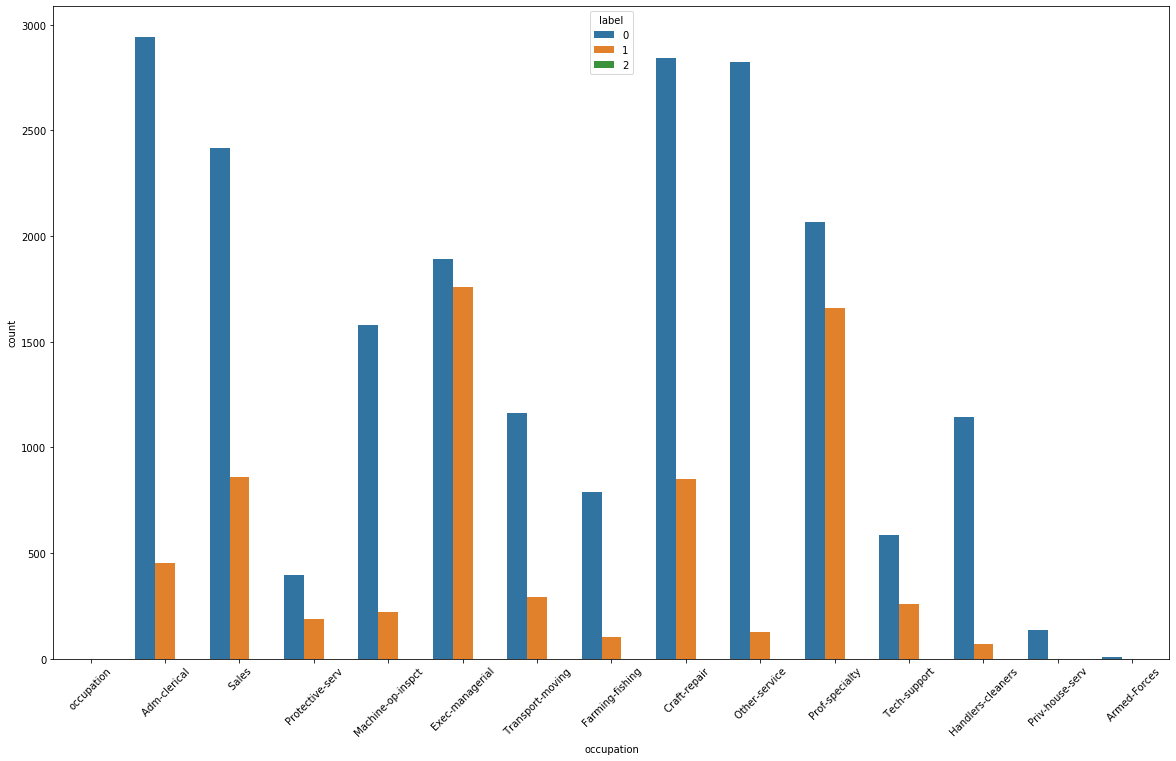

In [38]:
# pentru 'occupation' 
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'label', data = dataset)

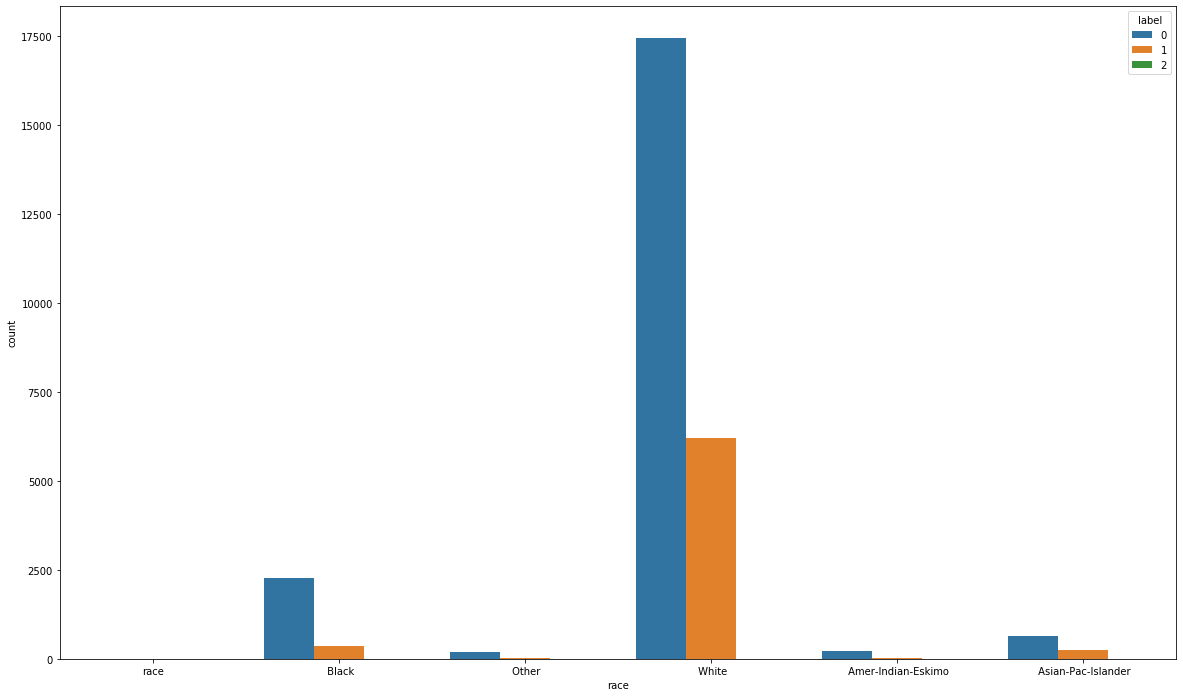

In [39]:
# pentru 'race'

sns.countplot(x = 'race', hue = 'label', data = dataset)

In [40]:
# se observa ca predomina informatii despre rasa 'White', in consecinta, le voi comprima pe celelalte in una
dataset['race'].unique()
dataset['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' other', inplace = True)

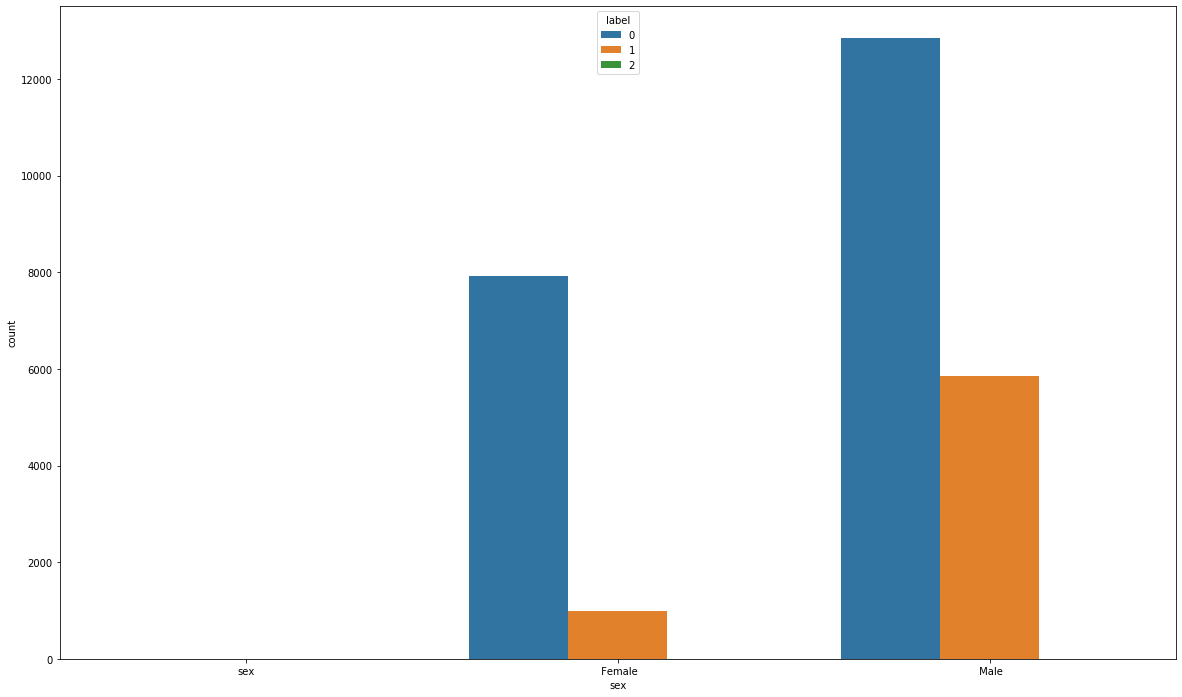

In [41]:
#pentru coloana 'sex'
sns.countplot(x = 'sex', hue = 'label', data = dataset)

In [42]:
# observam ca barbatii predomina, atat ca numar in esantion, cat si in ceea ce priveste genul ce are mai mult de 50K

In [43]:
# pentru 'native-country'
country_count = dataset['native-country'].value_counts()
country_count

 United-States                 24755
 Mexico                          543
 ?                               503
 Philippines                     167
 Germany                         120
 Canada                           98
 Puerto-Rico                      98
 El-Salvador                      89
 India                            88
 Cuba                             81
 England                          78
 Jamaica                          68
 South                            68
 Italy                            64
 China                            61
 Dominican-Republic               59
 Guatemala                        59
 Vietnam                          55
 Japan                            53
 Poland                           50
 Columbia                         50
 Haiti                            40
 Taiwan                           39
 Iran                             37
 Nicaragua                        31
 Portugal                         30
 Greece                           27
 

Text(0.5, 1.0, 'Total adults from each Country')

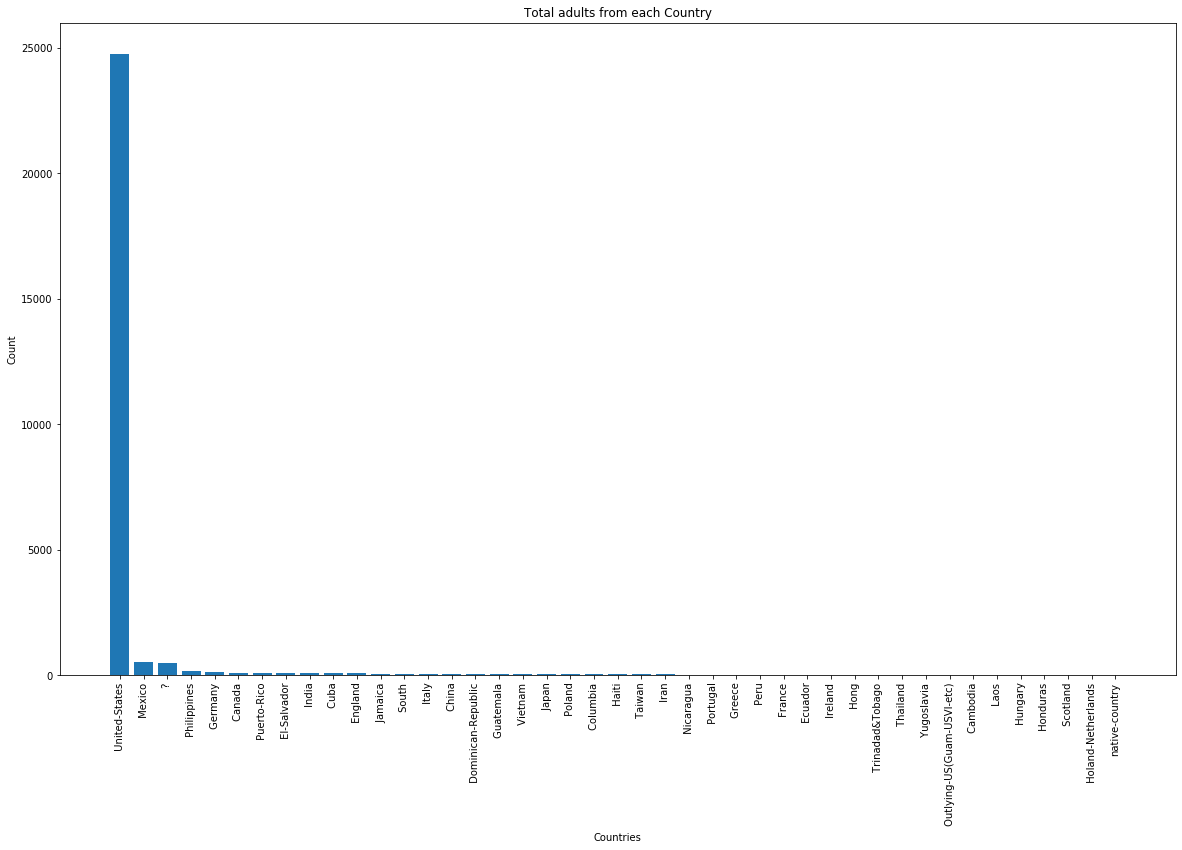

In [44]:
#observam ca avem date lipsa
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [45]:
#lipsesc date. In plus, cele mai multe persoane sunt din US, iar din celelalte state sunt foarte putine. 
#pentru a fi mai usor, voi comprima celalalte tari in clasa 'others'


In [46]:
dataset = dataset.drop(dataset[dataset['native-country'] == ' ?'].index)


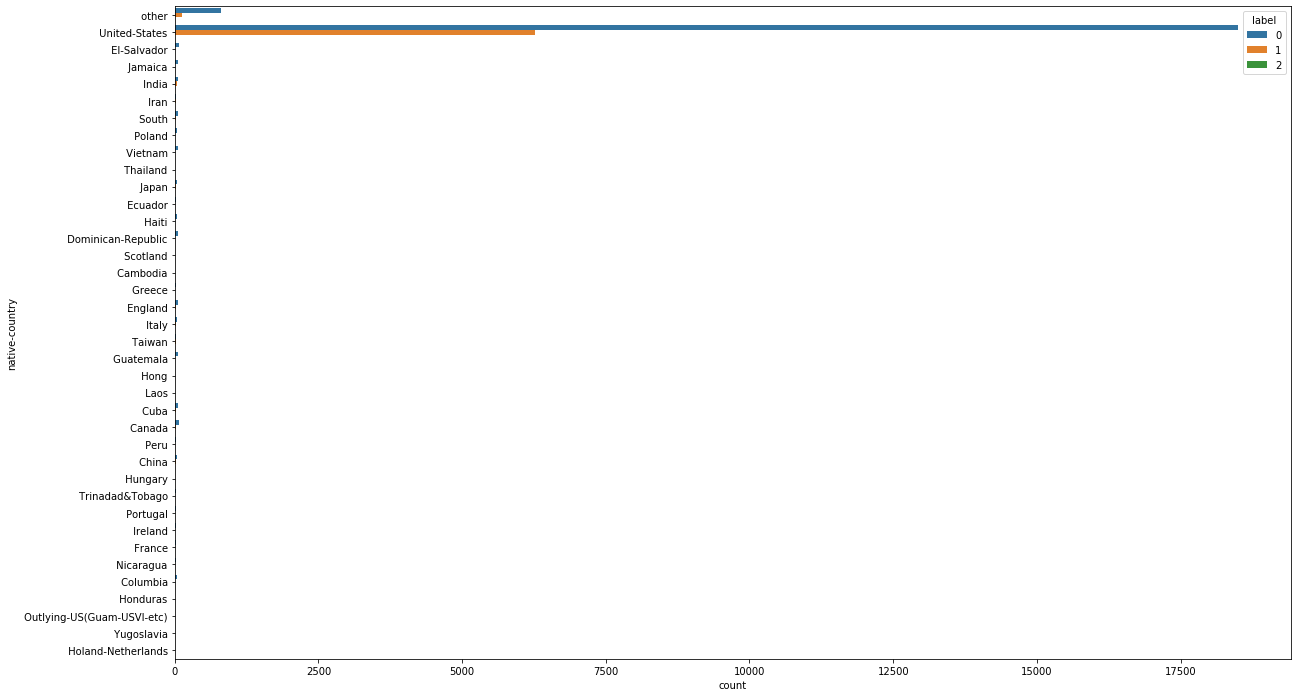

In [47]:
countries = np.array(dataset['native-country'].unique())
countries = np.delete(countries,0)
dataset['native-country'].replace([' Mexico', ' Philippines', ' Germany', ' Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'Cuba', 'England','South', 'Jamaica', 'Italy', 'China', 'Guatemala', 'Dominican-Republic', 'Vietnam', 'Japan', 'Columbia', 'Poland', 'Haiti', 'Taiwan', 'Iran', 'Nicaragua', 'Portugal', 'Greece', 'Peru', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Thailand', 'Cambodia', 'Laos', 'Outlying-US(Guam-USVI-etc)', 'Yugoslavia', 'Hungary', 'Scotland', 'Honduras', 'Holand-Netherlands', 'native-country' ],' other', inplace = True)
sns.countplot(y = 'native-country', hue = 'label', data = dataset)

In [48]:
#countries = np.array(dataset['native-country'].unique())
#countries = np.delete(countries,0)
#dataset['native-country'].replace(countries, 'other', inplace = True)
#sns.countplot(x = 'native-country', hue = 'label', data = dataset)

In [49]:
#manipularea datelor
#separam coloanele pentru fiecare feature cu valori unice in dataset
y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 100


In [50]:
#incep test si train pentru aceste date

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [51]:
#aplic urmatorii algoritmi de clasificare:
#Naive Bayes Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier si Gradient Boosting Classifier.

In [52]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [53]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier"]
accuracies = []


In [ ]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.64


In [ ]:
#analizam rezultatele
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [ ]:
#pentru a putea aplica aceleasi lucruri pentru noi date, avem:

#making individual predictions
def make_ind_prediction(new_data):
    data= new_data.values.reshape(1,-1)
    data= robust_scaler.transform(data)
    prob= logistic_regression.predict_proba(data)[0][1]
    if (prob>=0.35):
        return '>50K'
    else:
        return '<=50K'

from collections import OrderedDict
#am dat un exemplu de feature-uri pentru un nou client
new_customer=OrderedDict([('',3626), ('age',50), ('workclass',"State-gov"),
                          ('fnlwgt',152450), ('education',"Some-college"), ('education-num',12), 
                         ('marital-status',"Married"), ('occupation',"Sales"), ('relationship',"Wife"),
                         ('race',"White"), ('sex',"Female"), ('capital-gain',0), ('capital-loss',0),
                         ('hours-per-week',45), ('native-country',"United-States")])
new_customer= pd.Series(new_customer)
new_customer
make_ind_prediction(new_customer)

In [ ]:
#exercitiul 2!!!!!!!
#putem face o recomandare pe baza comportamentului variabilelor ce sunt corelate cu coloana 'label'
#de exemplu, nu am putea face o recomandare legata de valorile din coloana 'fnlwgt', deoarece au corelatie 0 cu 'label'
#urmarind variabilele strans corelate, putem recomanda clientului sa procedeze in asa fel incat cele corelate pozitiv sa ajunga la valorile dorite